# ChainMap

What is ChainMap in Python?

ChainMap is a class in the collections module that allows you to group multiple dictionaries (or other mappings) together to create a single, updateable view. When you look up a key in a ChainMap, it searches through the underlying mappings in the order they were added until it finds the key. When you modify a ChainMap, the changes are typically written to the first mapping in the chain.
Think of it as a linked list of dictionaries. When you try to access a key, you traverse the list until you find it. When you add a key, it's usually added to the front of the list (the first dictionary).

Key Characteristics of ChainMap:

* Groups Multiple Mappings: It takes a list of dictionaries (or other mappings) as input and presents them as a single view.
* Ordered Lookup: When you try to access a key, it searches the mappings in the order they were provided. The first occurrence of the key is returned.
* Updateable (Typically the First Mapping): When you add, modify, or delete a key in a ChainMap, these operations usually affect the first mapping in the chain. The other underlying mappings remain unchanged.
* Efficient for Lookups in Layered Configurations: It's particularly useful for managing layered configurations where settings in later layers override earlier ones.
* Maintains Insertion Order (within each underlying dictionary and the order of dictionaries in the chain): The order of keys within each dictionary in the chain is preserved (as per Python 3.7+ dict behavior), and the order of the dictionaries in the ChainMap itself is also maintained.

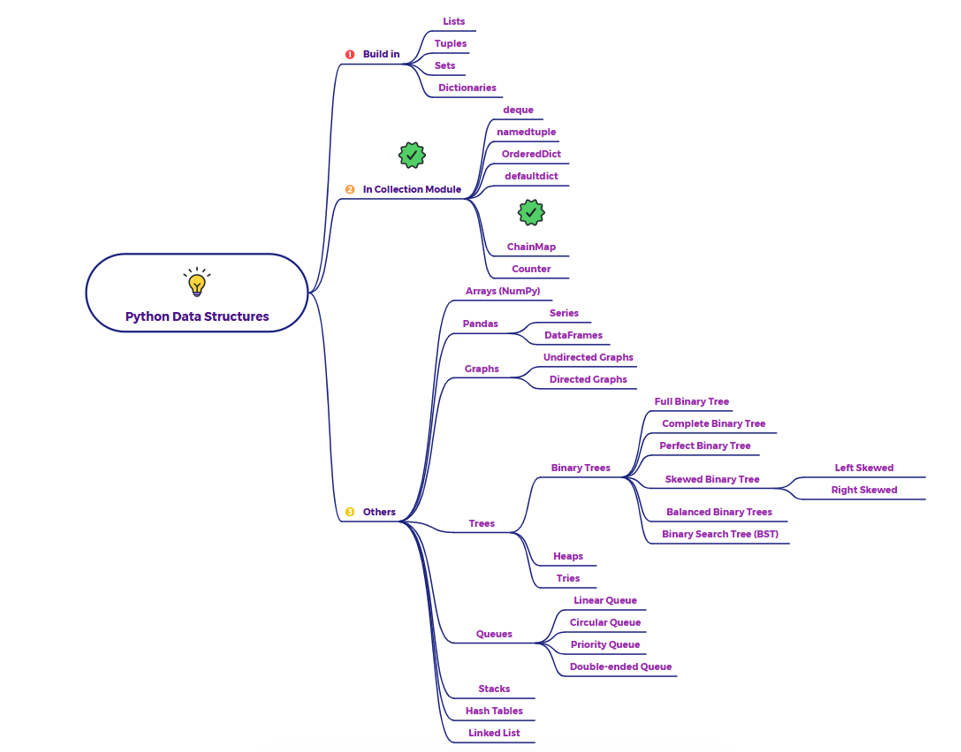

# 1. Define a Utility function to print highlighted characteristics

In [83]:
import collections

def highlight_characteristic(name, description, symbol='='):
    """Helper function to print highlighted characteristics."""
    print(f"\n{symbol*5} {name.upper()} {symbol*5}")
    print(description)
    print(f"{symbol*5} {name.upper()} {symbol*5}\n")

print("--- Python ChainMap Data Structure: Layered Configuration System Example ---")

--- Python ChainMap Data Structure: Layered Configuration System Example ---


In [84]:
# --- Scenario Setup: Different Configuration Layers ---

# 1. Global Default Settings (lowest priority)

default_settings = {
    'log_level': 'INFO',
    'max_connections': 100,
    'cache_enabled': True,
    'debug_mode': False,
    'timeout_seconds': 30
}
print(f"1. Default Settings: {default_settings}")

# 2. Environment-Specific Settings (e.g., 'development' overrides defaults)

dev_settings = {
    'log_level': 'DEBUG', # Overrides default
    'debug_mode': True,   # Overrides default
    'max_connections': 50 # Lower for dev environment
}
print(f"2. Development Settings: {dev_settings}")

# 3. User-Specific Overrides (highest priority for a specific user)

user_settings = {
    'log_level': 'TRACE', # Overrides dev/default
    'timeout_seconds': 60 # Overrides default
}
print(f"3. User-Specific Settings: {user_settings}\n")

1. Default Settings: {'log_level': 'INFO', 'max_connections': 100, 'cache_enabled': True, 'debug_mode': False, 'timeout_seconds': 30}
2. Development Settings: {'log_level': 'DEBUG', 'debug_mode': True, 'max_connections': 50}
3. User-Specific Settings: {'log_level': 'TRACE', 'timeout_seconds': 60}



# 2. Groups Multiple Mappings:

* default_settings, dev_settings, and user_settings are three separate dictionaries.
* collections.ChainMap(user_settings, dev_settings, default_settings) combines them into a single active_config object, providing a unified interface to access settings across all layers.
* active_config.maps explicitly shows the list of underlying dictionaries.

In [85]:
# 1. Groups Multiple Mappings Characteristic

highlight_characteristic(
    "Groups Multiple Mappings",
    "ChainMap combines several dictionaries (or other mappings) into a single, cohesive view."
)

# Create a ChainMap, placing the highest priority config first
# The order is: user_settings -> dev_settings -> default_settings
active_config = collections.ChainMap(user_settings, dev_settings, default_settings)
print(f"Combined Active Configuration (ChainMap view): {active_config}")
print(f"Underlying maps (ChainMap.maps): {active_config.maps}\n")


===== GROUPS MULTIPLE MAPPINGS =====
ChainMap combines several dictionaries (or other mappings) into a single, cohesive view.
===== GROUPS MULTIPLE MAPPINGS =====

Combined Active Configuration (ChainMap view): ChainMap({'log_level': 'TRACE', 'timeout_seconds': 60}, {'log_level': 'DEBUG', 'debug_mode': True, 'max_connections': 50}, {'log_level': 'INFO', 'max_connections': 100, 'cache_enabled': True, 'debug_mode': False, 'timeout_seconds': 30})
Underlying maps (ChainMap.maps): [{'log_level': 'TRACE', 'timeout_seconds': 60}, {'log_level': 'DEBUG', 'debug_mode': True, 'max_connections': 50}, {'log_level': 'INFO', 'max_connections': 100, 'cache_enabled': True, 'debug_mode': False, 'timeout_seconds': 30}]



# 3. Ordered Lookup:

* When active_config['log_level'] is requested, it first looks in user_settings (the first map). It finds 'TRACE' there and returns it, ignoring the 'DEBUG' in dev_settings and 'INFO' in default_settings.
* For debug_mode, it's not in user_settings, so it checks dev_settings, finds True, and returns it.
* For cache_enabled, it's only in default_settings, so it's retrieved from there.
* This demonstrates the "first-match-wins" lookup strategy based on the order of maps in the ChainMap.

In [86]:
# 2. Ordered Lookup Characteristic

highlight_characteristic(
    "Ordered Lookup",
    "When accessing a key, ChainMap searches the underlying mappings in the order they were provided (from first to last). The value from the first map containing the key is returned."
)

print(f"Requesting 'log_level': {active_config['log_level']} "
      f"(Found in user_settings, overrides dev_settings and default_settings)")
print(f"Requesting 'debug_mode': {active_config['debug_mode']} "
      f"(Found in dev_settings, overrides default_settings)")
print(f"Requesting 'max_connections': {active_config['max_connections']} "
      f"(Found in dev_settings, overrides default_settings)")
print(f"Requesting 'cache_enabled': {active_config['cache_enabled']} "
      f"(Only found in default_settings)")
print(f"Requesting 'timeout_seconds': {active_config['timeout_seconds']} "
      f"(Found in user_settings, overrides default_settings)\n")

# Demonstrating keys() and items() which show the combined view, respecting lookup order
print("All keys in ChainMap (unique, respecting lookup order):")
print(list(active_config.keys()))
print("\nAll items in ChainMap (unique, respecting lookup order):")
print(list(active_config.items()))


===== ORDERED LOOKUP =====
When accessing a key, ChainMap searches the underlying mappings in the order they were provided (from first to last). The value from the first map containing the key is returned.
===== ORDERED LOOKUP =====

Requesting 'log_level': TRACE (Found in user_settings, overrides dev_settings and default_settings)
Requesting 'debug_mode': True (Found in dev_settings, overrides default_settings)
Requesting 'max_connections': 50 (Found in dev_settings, overrides default_settings)
Requesting 'cache_enabled': True (Only found in default_settings)
Requesting 'timeout_seconds': 60 (Found in user_settings, overrides default_settings)

All keys in ChainMap (unique, respecting lookup order):
['log_level', 'max_connections', 'cache_enabled', 'debug_mode', 'timeout_seconds']

All items in ChainMap (unique, respecting lookup order):
[('log_level', 'TRACE'), ('max_connections', 50), ('cache_enabled', True), ('debug_mode', True), ('timeout_seconds', 60)]


# 4. Updateable:

* Adding: active_config['new_feature_flag'] = True adds the new key-value pair directly to user_settings (the first map in the chain). This shows that additions always target the "front" of the chain.
* Modifying: active_config['log_level'] = 'CRITICAL' changes the value of log_level in user_settings because user_settings is the first map that contains that key. It does not affect dev_settings or default_settings, which might also contain log_level.
* Deleting: del active_config['timeout_seconds'] removes the key from the first map (user_settings) where it's found.

In [87]:
# 3. Updateable Characteristic

highlight_characteristic(
    "Updateable",
    "New key-value pairs are always added to the *first* (current) mapping in the chain. "
    "Modifying an existing key's value modifies it in the *first* mapping where that key is found."
)

print(f"Initial ChainMap: {active_config}")
print(f"User Settings BEFORE update: {user_settings}")

# Add a new setting (added to user_settings, the first map)
active_config['new_feature_flag'] = True
print(f"After adding 'new_feature_flag': {active_config}")
print(f"User Settings AFTER addition (note new key): {user_settings}") # It's in user_settings!

# Modify an existing setting (modifies the first occurrence in the chain)
active_config['log_level'] = 'CRITICAL' # Modifies 'log_level' in user_settings
print(f"After modifying 'log_level': {active_config}")
print(f"User Settings AFTER modification: {user_settings} (note updated log_level)")
print(f"Dev Settings (log_level remains 'DEBUG'): {dev_settings}\n") # Dev settings unaffected

# Removing an item also removes from the first encountered map
print(f"User Settings BEFORE deletion: {user_settings}")
del active_config['timeout_seconds']
print(f"After deleting 'timeout_seconds': {active_config}")
print(f"User Settings AFTER deletion: {user_settings}\n") # timeout_seconds is removed from user_settings


===== UPDATEABLE =====
New key-value pairs are always added to the *first* (current) mapping in the chain. Modifying an existing key's value modifies it in the *first* mapping where that key is found.
===== UPDATEABLE =====

Initial ChainMap: ChainMap({'log_level': 'TRACE', 'timeout_seconds': 60}, {'log_level': 'DEBUG', 'debug_mode': True, 'max_connections': 50}, {'log_level': 'INFO', 'max_connections': 100, 'cache_enabled': True, 'debug_mode': False, 'timeout_seconds': 30})
User Settings BEFORE update: {'log_level': 'TRACE', 'timeout_seconds': 60}
After adding 'new_feature_flag': ChainMap({'log_level': 'TRACE', 'timeout_seconds': 60, 'new_feature_flag': True}, {'log_level': 'DEBUG', 'debug_mode': True, 'max_connections': 50}, {'log_level': 'INFO', 'max_connections': 100, 'cache_enabled': True, 'debug_mode': False, 'timeout_seconds': 30})
User Settings AFTER addition (note new key): {'log_level': 'TRACE', 'timeout_seconds': 60, 'new_feature_flag': True}
After modifying 'log_level': Ch

# 5. Maintains Insertion Order:

* Since Python 3.7+, standard dictionaries inherently maintain insertion order. The example explicitly prints the keys() of the individual maps to show this.
* When ChainMap iterates or presents its keys(), it combines the keys from all maps, respecting the lookup order (earlier maps take precedence) and the insertion order within each map. The order of the maps themselves when constructing the ChainMap is also strictly maintained for lookup.

In [88]:
# 4. Maintains Insertion Order Characteristic

highlight_characteristic(
    "Maintains Insertion Order",
    "While ChainMap itself defines the order of the *maps*, the individual dictionaries within the ChainMap maintain their own insertion order (since Python 3.7+ for standard dicts)."
)

# Our original dictionaries already have insertion order preserved (Python 3.7+ default dict)
# When iterating through ChainMap, this order is respected within each map as it's traversed.

print(f"Order of keys in default_settings: {list(default_settings.keys())}")
print(f"Order of keys in dev_settings: {list(dev_settings.keys())}")
print(f"Order of keys in user_settings: {list(user_settings.keys())}")

# When ChainMap presents keys, it's a unique set, but the iteration within each map is ordered.
# The overall iteration order is determined by the ChainMap's internal map order and the individual map's order.
print(f"\nKeys from ChainMap (reflects combined ordered lookup):")
for key in active_config.keys():
    print(key, end=" -> ")
print("...\n")


===== MAINTAINS INSERTION ORDER =====
While ChainMap itself defines the order of the *maps*, the individual dictionaries within the ChainMap maintain their own insertion order (since Python 3.7+ for standard dicts).
===== MAINTAINS INSERTION ORDER =====

Order of keys in default_settings: ['log_level', 'max_connections', 'cache_enabled', 'debug_mode', 'timeout_seconds']
Order of keys in dev_settings: ['log_level', 'debug_mode', 'max_connections']
Order of keys in user_settings: ['log_level', 'new_feature_flag']

Keys from ChainMap (reflects combined ordered lookup):
log_level -> max_connections -> cache_enabled -> debug_mode -> timeout_seconds -> new_feature_flag -> ...



# COMPLETED